## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataset = pd.merge(mouse_metadata, study_results, how="left",on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
orig_number_of_mice = len(merged_dataset["Mouse ID"].unique())
print(f"Number of mice: {orig_number_of_mice}")

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_dataset[merged_dataset.duplicated(subset=["Mouse ID","Timepoint"])]
print(f"The duplicate mouse ID is {duplicate.iloc[0,0]}.")

The duplicate mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = duplicate["Mouse ID"].drop_duplicates()
merged_dataset.loc[merged_dataset["Mouse ID"]==duplicate_mouse_ID.iloc[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_dataset.drop(merged_dataset[merged_dataset["Mouse ID"]=="g989"].index, inplace = False)
clean_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_merged_data["Mouse ID"].unique())
print(f"Number of mice: {number_of_mice}")

Number of mice: 248


In [7]:
clean_merged_data.groupby(["Drug Regimen"]).mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = clean_merged_data["Tumor Volume (mm3)"]
tumor_vol_mean = clean_merged_data["Tumor Volume (mm3)"].mean()
tumor_vol_median = clean_merged_data["Tumor Volume (mm3)"].median()
tumor_vol_var = clean_merged_data["Tumor Volume (mm3)"].var()
tumor_vol_stdev = clean_merged_data["Tumor Volume (mm3)"].std()
tumor_vol_sem = clean_merged_data["Tumor Volume (mm3)"].sem()

summary_dict = {
    "Tumor Vol (mm3) Mean": [tumor_vol_mean], 
    "Tumor Vol (mm3) Median": [tumor_vol_median], 
    "Tumor Vol (mm3) Variance": [tumor_vol_var], 
    "Tumor Vol (mm3) Std_Dev": [tumor_vol_stdev], 
    "Tumor Vol (mm3) SEM": [tumor_vol_sem]
}
summary_df = pd.DataFrame(summary_dict)
summary_df


,Tumor Vol (mm3) Mean,Tumor Vol (mm3) Median,Tumor Vol (mm3) Variance,Tumor Vol (mm3) Std_Dev,Tumor Vol (mm3) SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_data_groupby = clean_merged_data.groupby("Drug Regimen")
mean = clean_data_groupby["Tumor Volume (mm3)"].mean() 
median = clean_data_groupby["Tumor Volume (mm3)"].median() 
variance = clean_data_groupby["Tumor Volume (mm3)"].var() 
std_dev = clean_data_groupby["Tumor Volume (mm3)"].std() 
sem = clean_data_groupby["Tumor Volume (mm3)"].sem() 

summary_bydrug_df = pd.DataFrame({
    "Tumor Vol (mm3) Mean": mean,
    "Tumor Vol (mm3) Median": median,
    "Tumor Vol (mm3) Variance": variance,
    "Tumor Vol (mm3) Std_Dev": std_dev,
    "Tumor Vol (mm3) SEM": sem
})
summary_bydrug_df

,Tumor Vol (mm3) Mean,Tumor Vol (mm3) Median,Tumor Vol (mm3) Variance,Tumor Vol (mm3) Std_Dev,Tumor Vol (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement_count = clean_merged_data.value_counts(["Drug Regimen"])
measurement_count

Drug Regimen
Capomulin       230
Ramicane        228
Ketapril        188
Naftisol        186
Zoniferol       182
Placebo         181
Stelasyn        181
Ceftamin        178
Infubinol       178
Propriva        148
dtype: int64

Text(0, 0.5, 'Number of Measurements')

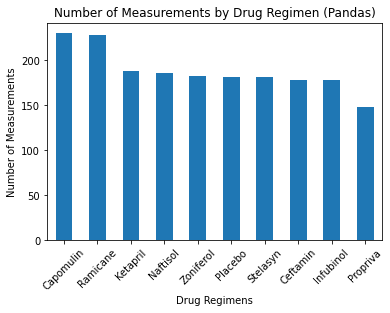

In [12]:
chart_df = pd.DataFrame({
    "Count": measurement_count,
})
chart_df.reset_index(inplace=True)
pandas_bar = chart_df.plot(x="Drug Regimen", y ="Count", kind="bar", 
                           title="Number of Measurements by Drug Regimen (Pandas)", legend=False, rot=45)
pandas_bar.set_xlabel("Drug Regimens")
pandas_bar.set_ylabel("Number of Measurements")

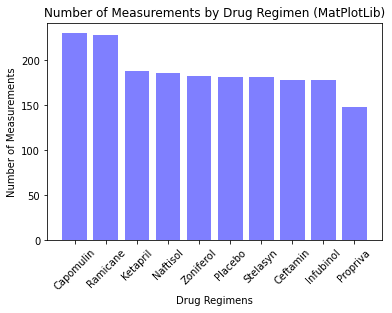

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(chart_df["Drug Regimen"], chart_df["Count"], color='b', alpha=0.5, align="center")
plt.xticks(rotation = 45)
plt.title("Number of Measurements by Drug Regimen (MatPlotLib)")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
plt.show()

Text(0, 0.5, '')

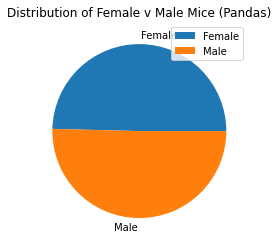

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_merged_data[["Mouse ID","Sex"]].drop_duplicates()
gender_count_groupby =gender_count.groupby(["Sex"]).count()
gender_count_groupby
pandas_pie = gender_count_groupby.plot.pie(y="Mouse ID", title="Distribution of Female v Male Mice (Pandas)")
pandas_pie.set_ylabel('')

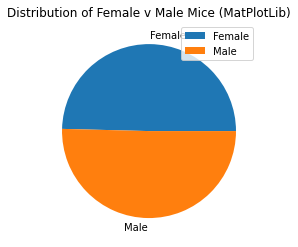

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Female", "Male"]
plt.pie(gender_count_groupby["Mouse ID"], labels=labels)
plt.title("Distribution of Female v Male Mice (MatPlotLib)")
plt.legend(labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
